# AGENDA OF DATA

### CHECKING SYSTEM CONFIGURATION

In [1]:
import IPython
print(IPython.sys_info())

{'commit_hash': 'd774f565b',
 'commit_source': 'installation',
 'default_encoding': 'cp1252',
 'ipython_path': 'C:\\Anaconda\\lib\\site-packages\\IPython',
 'ipython_version': '7.4.0',
 'os_name': 'nt',
 'platform': 'Windows-10-10.0.18362-SP0',
 'sys_executable': 'C:\\Anaconda\\python.exe',
 'sys_platform': 'win32',
 'sys_version': '3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit '
                '(AMD64)]'}


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset and giving the heads to the columns and initiating eda

In [3]:
haberman_dataset = pd.read_csv(r"C:\Users\HP\Desktop\Haberman_dataset.csv", header=None, names=['age', 'operation_year', 'nodes', 'survived_status'])
haberman_dataset.head(10)

,age,operation_year,nodes,survived_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [4]:
haberman_dataset.shape

(306, 4)

In [5]:
haberman_dataset.columns

Index(['age', 'operation_year', 'nodes', 'survived_status'], dtype='object')

In [6]:
haberman_dataset.describe()

,age,operation_year,nodes,survived_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
haberman_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   operation_year   306 non-null    int64
 2   nodes            306 non-null    int64
 3   survived_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [8]:
for n, c in enumerate(haberman_dataset.columns):
    print('Variable {}\n\tname: {}\n\ttype: {}'.format(n, c, type(haberman_dataset.iloc[0, n])))
    print('\tUnique Values: {}'.format(haberman_dataset[c].unique()))

Variable 0
	name: age
	type: <class 'numpy.int64'>
	Unique Values: [30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78
 83]
Variable 1
	name: operation_year
	type: <class 'numpy.int64'>
	Unique Values: [64 62 65 59 58 60 66 61 67 63 69 68]
Variable 2
	name: nodes
	type: <class 'numpy.int64'>
	Unique Values: [ 1  3  0  2  4 10  9 30  7 13  6 15 21 11  5 23  8 20 52 14 19 16 12 24
 46 18 22 35 17 25 28]
Variable 3
	name: survived_status
	type: <class 'numpy.int64'>
	Unique Values: [1 2]


### Creating a copy of original dataset

In [9]:
haberman_dataset_cleaned = haberman_dataset.copy()

In [10]:
haberman_dataset_cleaned.head()

,age,operation_year,nodes,survived_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [11]:
haberman_dataset_cleaned.shape

(306, 4)

#### No Missing value were found in our dataset, but we need to label our class in readable format, as survived features say 1 means survived which can be decoded as 'survived', and 2- not survived which can b labeled as 'dead'

In [12]:
haberman_dataset_cleaned['survived_status'] = haberman_dataset_cleaned['survived_status'].map({1:'Survived', 2:'Didntsurvive'})
haberman_dataset_cleaned.head(20)

,age,operation_year,nodes,survived_status
0,30,64,1,Survived
1,30,62,3,Survived
2,30,65,0,Survived
3,31,59,2,Survived
4,31,65,4,Survived
5,33,58,10,Survived
6,33,60,0,Survived
7,34,59,0,Didntsurvive
8,34,66,9,Didntsurvive
9,34,58,30,Survived


In [13]:
haberman_dataset_cleaned['survived_status'].value_counts()

Survived        225
Didntsurvive     81
Name: survived_status, dtype: int64

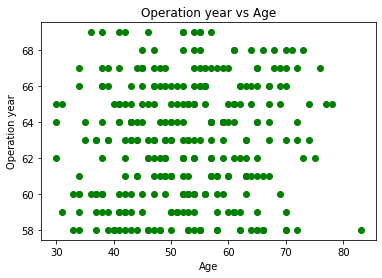

In [14]:
plt.scatter(haberman_dataset_cleaned['age'],haberman_dataset_cleaned['operation_year'], c = 'g')
plt.xlabel('Age')
plt.ylabel('Operation year')
plt.title('Operation year vs Age')
plt.show()

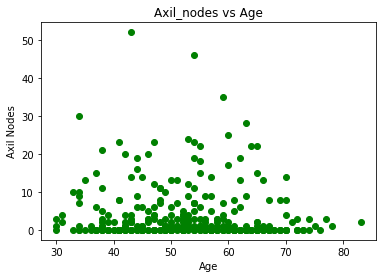

In [15]:
plt.scatter(haberman_dataset_cleaned['age'],haberman_dataset_cleaned['nodes'], color = 'g')
plt.xlabel('Age')
plt.ylabel('Axil Nodes')
plt.title('Axil_nodes vs Age')
plt.show()

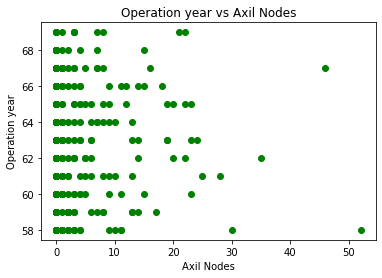

In [16]:
plt.scatter(haberman_dataset_cleaned['nodes'], haberman_dataset_cleaned['operation_year'], c = 'g')
plt.xlabel('Axil Nodes')
plt.ylabel('Operation year')
plt.title('Operation year vs Axil Nodes')
plt.show()

In [17]:
import warnings
warnings.filterwarnings('ignore')

### Pairplot Plot

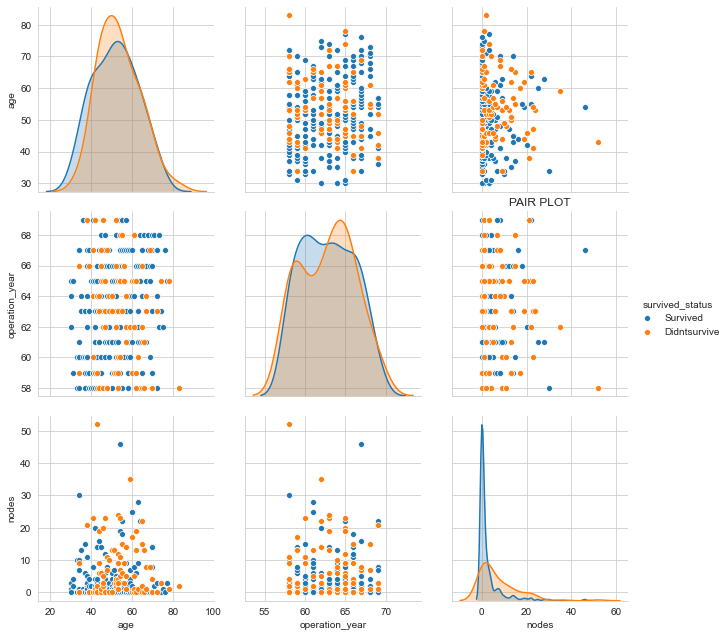

In [18]:
# (PAIR PLOT)
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman_dataset_cleaned,hue="survived_status",height=3)
plt.title("PAIR PLOT")
plt.show()

### Scatter Plots

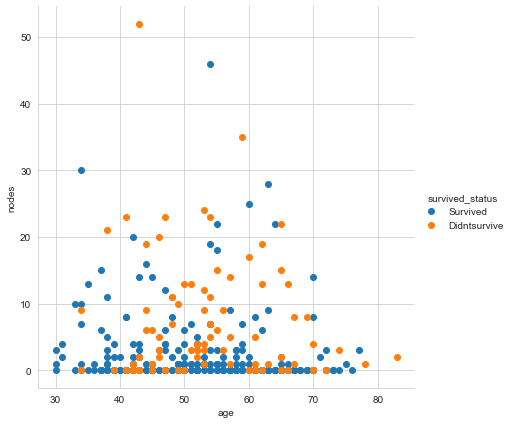

In [19]:
sns.set_style('whitegrid');
sns.FacetGrid(haberman_dataset_cleaned, hue = 'survived_status', size = 6).map(plt.scatter, 'age', 'nodes').add_legend();
plt.show();

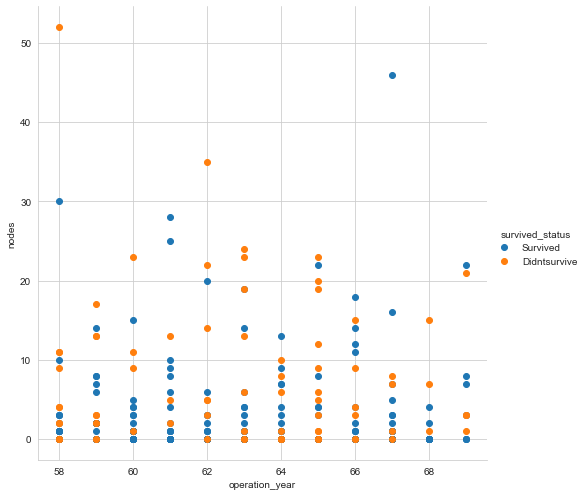

In [20]:
sns.set_style('whitegrid');
sns.FacetGrid(haberman_dataset_cleaned, hue='survived_status', size = 7).map(plt.scatter, 'operation_year', 'nodes').add_legend();
plt.show()

### Shaping the histogram for PDF and CDF

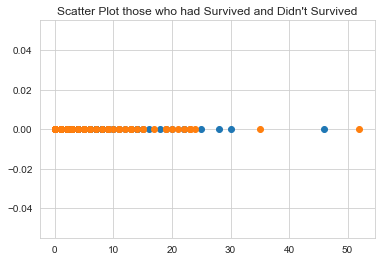

In [21]:
haberman_survived=haberman_dataset_cleaned.loc[haberman_dataset_cleaned['survived_status']=='Survived']
haberman_Didntsurvive=haberman_dataset_cleaned.loc[haberman_dataset_cleaned['survived_status']=='Didntsurvive']

In [ ]:
plt.plot(haberman_survived['nodes'],np.zeros_like(haberman_survived['nodes']),'o')
plt.plot(haberman_Didntsurvive['nodes'],np.zeros_like(haberman_Didntsurvive['nodes']),'o')
plt.title("Scatter Plot those who had Survived and Didn't Survived")
plt.show()

### Univariate Analysis

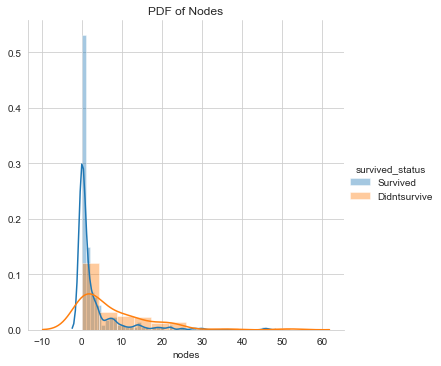

In [22]:
sns.FacetGrid(haberman_dataset_cleaned, hue="survived_status", height=5).map(sns.distplot, "nodes").add_legend();
plt.title("PDF of Nodes")
plt.show();

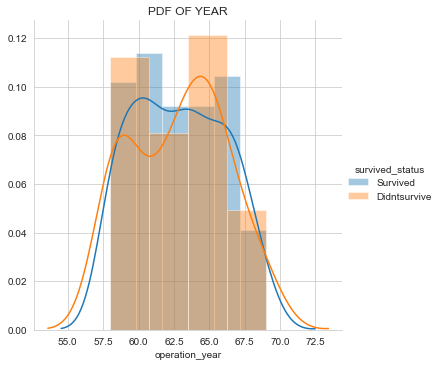

In [23]:
sns.FacetGrid(haberman_dataset_cleaned, hue="survived_status", height=5).map(sns.distplot, "operation_year").add_legend();
plt.title("PDF OF YEAR")
plt.show();

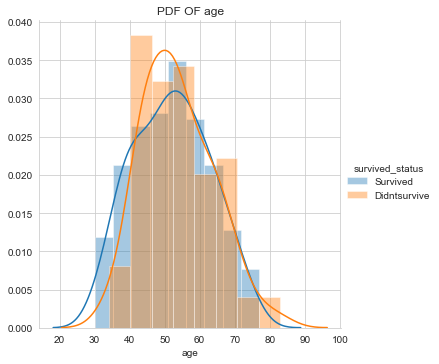

In [24]:
sns.FacetGrid(haberman_dataset_cleaned, hue="survived_status", height=5).map(sns.distplot, "age").add_legend();
plt.title("PDF OF age")
plt.show();

## PDF & CDF OF AGE

[0.01633987 0.03594771 0.02614379 0.0620915  0.09803922 0.05228758
 0.08169935 0.09150327 0.08169935 0.09803922 0.08496732 0.04901961
 0.06535948 0.06862745 0.01960784 0.03921569 0.01633987 0.00653595
 0.00326797 0.00326797]
[30.   32.65 35.3  37.95 40.6  43.25 45.9  48.55 51.2  53.85 56.5  59.15
 61.8  64.45 67.1  69.75 72.4  75.05 77.7  80.35 83.  ]


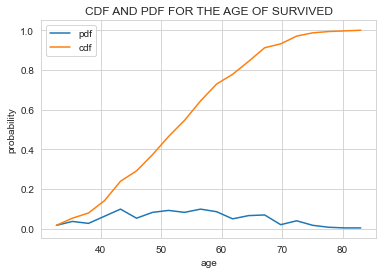

In [25]:
counts,bins=np.histogram(haberman_dataset_cleaned['age'], bins = 20, density = True)
pdf=counts/(sum(counts))
print(pdf)
print(bins)

#compute CDF
cdf=np.cumsum(pdf)
plt.plot(bins[1:],pdf,label='pdf')
plt.plot(bins[1:],cdf,label='cdf')
plt.xlabel('age')
plt.ylabel('probability')
plt.title("CDF AND PDF FOR THE AGE OF SURVIVED")
plt.legend()
plt.show()

## PDF & CDF OF NODES

[0.64379085 0.12745098 0.04575163 0.05228758 0.01960784 0.03921569
 0.00980392 0.01633987 0.02287582 0.00653595 0.00326797 0.00326797
 0.         0.00326797 0.         0.         0.         0.00326797
 0.         0.00326797]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


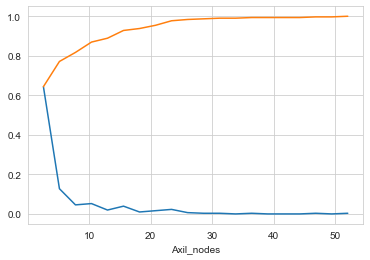

In [26]:
counts, bin_edges = np.histogram(haberman_dataset_cleaned['nodes'], bins=20, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Axil_nodes')
plt.show()

### Boxplot and Whiskers

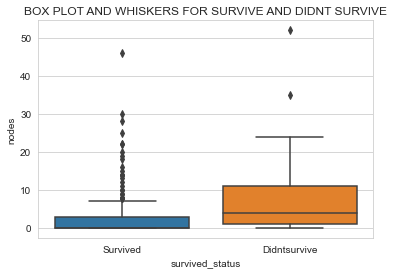

In [27]:
sns.boxplot(x='survived_status',y='nodes', data=haberman_dataset_cleaned)
plt.title("BOX PLOT AND WHISKERS FOR SURVIVE AND DIDNT SURVIVE")
plt.show()

### Violon Plot

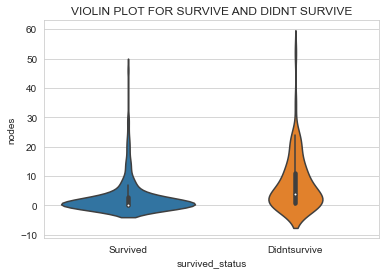

In [28]:
sns.violinplot(x='survived_status',y='nodes', data=haberman_dataset_cleaned, size=8)
plt.title("VIOLIN PLOT FOR SURVIVE AND DIDNT SURVIVE")
plt.show()

### Multivariate Analysis

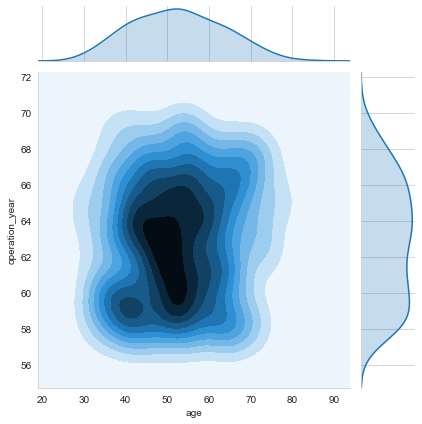

In [29]:
sns.jointplot(x= 'age',kind = 'kde', y='operation_year', data = haberman_dataset_cleaned)
plt.show()

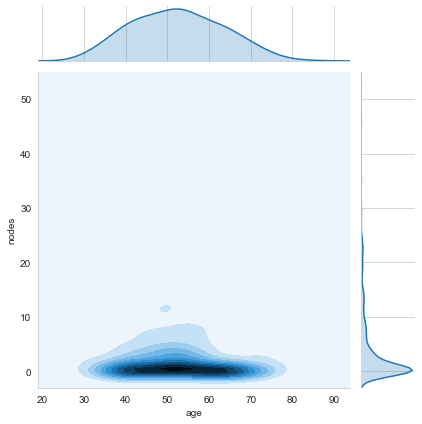

In [30]:
sns.jointplot(x= 'age',kind = 'kde', y='nodes', data = haberman_dataset_cleaned)
plt.show()


### Conclusion:::

## Model Building of the dataset

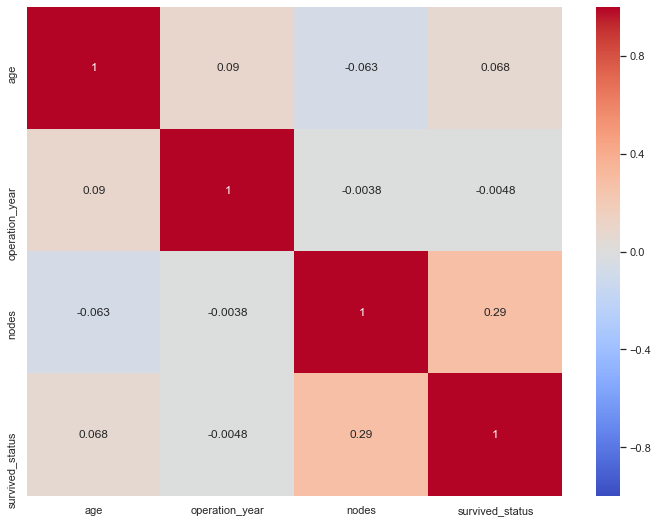

In [31]:
sns.set(rc={'figure.figsize': (12, 9)})
sns.heatmap(haberman_dataset.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib.ticker import FormatStrFormatter

In [33]:
# Making the splits inside the datasets:::
array = haberman_dataset.values
X = array[:,:3]
Y = array[:,3]
validation_size = 0.30
seed = 10
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, 
test_size=validation_size, random_state=seed)

### for the clarity let us print the splits

In [34]:
print(X)

[[30 64  1]
 [30 62  3]
 [30 65  0]
 [31 59  2]
 [31 65  4]
 [33 58 10]
 [33 60  0]
 [34 59  0]
 [34 66  9]
 [34 58 30]
 [34 60  1]
 [34 61 10]
 [34 67  7]
 [34 60  0]
 [35 64 13]
 [35 63  0]
 [36 60  1]
 [36 69  0]
 [37 60  0]
 [37 63  0]
 [37 58  0]
 [37 59  6]
 [37 60 15]
 [37 63  0]
 [38 69 21]
 [38 59  2]
 [38 60  0]
 [38 60  0]
 [38 62  3]
 [38 64  1]
 [38 66  0]
 [38 66 11]
 [38 60  1]
 [38 67  5]
 [39 66  0]
 [39 63  0]
 [39 67  0]
 [39 58  0]
 [39 59  2]
 [39 63  4]
 [40 58  2]
 [40 58  0]
 [40 65  0]
 [41 60 23]
 [41 64  0]
 [41 67  0]
 [41 58  0]
 [41 59  8]
 [41 59  0]
 [41 64  0]
 [41 69  8]
 [41 65  0]
 [41 65  0]
 [42 69  1]
 [42 59  0]
 [42 58  0]
 [42 60  1]
 [42 59  2]
 [42 61  4]
 [42 62 20]
 [42 65  0]
 [42 63  1]
 [43 58 52]
 [43 59  2]
 [43 64  0]
 [43 64  0]
 [43 63 14]
 [43 64  2]
 [43 64  3]
 [43 60  0]
 [43 63  2]
 [43 65  0]
 [43 66  4]
 [44 64  6]
 [44 58  9]
 [44 63 19]
 [44 61  0]
 [44 63  1]
 [44 61  0]
 [44 67 16]
 [45 65  6]
 [45 66  0]
 [45 67  1]
 [45

In [35]:
# Test options and evaluation metric

num_folds = 20
num_instances = len(X_train)
seed = 10
scoring = 'accuracy'

### Appending the alogorithm and cv_scoring to get the accuracy of all the models

In [36]:
algorithms = []
algorithms.append(('LR', LogisticRegression(solver='lbfgs')))
algorithms.append(('LDA', LinearDiscriminantAnalysis()))
algorithms.append(('KNN', KNeighborsClassifier()))
algorithms.append(('CART', DecisionTreeClassifier()))
algorithms.append(('NB', GaussianNB()))
algorithms.append(('SVM', SVC(gamma='scale')))
algorithms.append(('NN', MLPClassifier()))
algorithms.append(('RFC', RandomForestClassifier(n_estimators=100)))
# evaluate each model in turn
results = []
names = []
for name, algorithm in algorithms:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(algorithm, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.738182 (0.100848)
LDA: 0.738182 (0.100848)
KNN: 0.710000 (0.121828)
CART: 0.602727 (0.110674)
NB: 0.747273 (0.099445)
SVM: 0.715909 (0.111299)
NN: 0.715455 (0.148327)
RFC: 0.636364 (0.132490)


In [37]:
# Make predictions on validation dataset
knn =  GaussianNB()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.782608695652174
[[66  6]
 [14  6]]
              precision    recall  f1-score   support

           1       0.82      0.92      0.87        72
           2       0.50      0.30      0.37        20

    accuracy                           0.78        92
   macro avg       0.66      0.61      0.62        92
weighted avg       0.75      0.78      0.76        92



In [38]:
# Applying the trained model to unseen data

new_data = {'age': [30,34, 35,38,40,50,43,45,34,34,46,50,45,38,42],
           'operation_year': [65,64,63,64,66,64,64,64,63,63,64,67,64,65,67],
           'nodes': [4,10,15,8,40,25,23,40,3,40,3,1,4,2,4]}
final_data = pd.DataFrame(new_data)
final_data

,age,operation_year,nodes
0,30,65,4
1,34,64,10
2,35,63,15
3,38,64,8
4,40,66,40
5,50,64,25
6,43,64,23
7,45,64,40
8,34,63,3
9,34,63,40


### After Model Evaluation let's predict the data

In [39]:
prediction = knn.predict(final_data)
print("Prediction of data survival status: {}".format(prediction))

Prediction of data survival status: [1 1 2 1 2 2 2 2 1 2 1 1 1 1 1]
